<a href="https://colab.research.google.com/github/siddhantsawhney327/6thSem-ML-Lab/blob/main/1BM23CS327_Lab_2_CaliforniaHousing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from io import StringIO
import pandas as pd

data = """longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.12,241400.0,NEAR BAY
-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY
"""

df = pd.read_csv(StringIO(data))

df


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   
5    -122.25     37.85                52.0        919.0           213.0   
6    -122.25     37.84                52.0       2535.0           489.0   
7    -122.25     37.84                52.0       3104.0           687.0   
8    -122.26     37.84                42.0       2555.0           665.0   
9    -122.25     37.84                52.0       3549.0           707.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0   

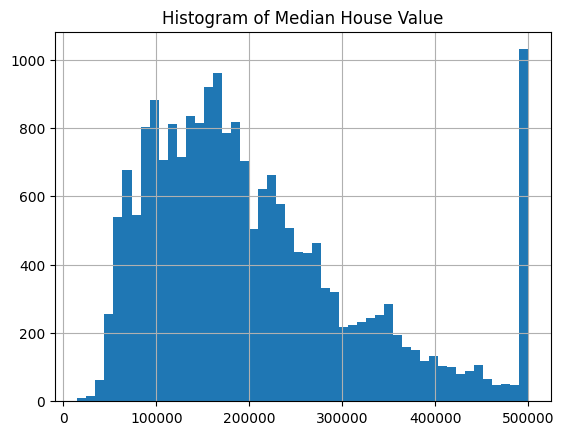

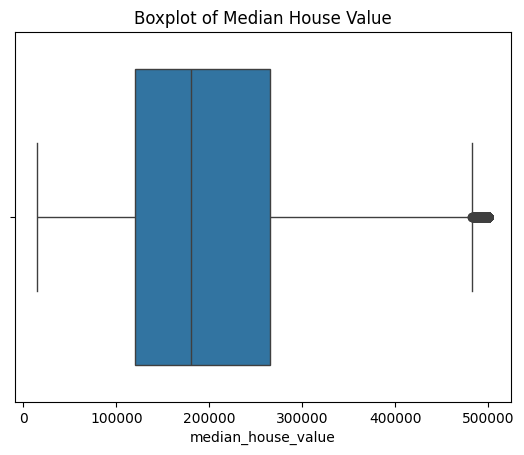


Missing Values (%):
longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64


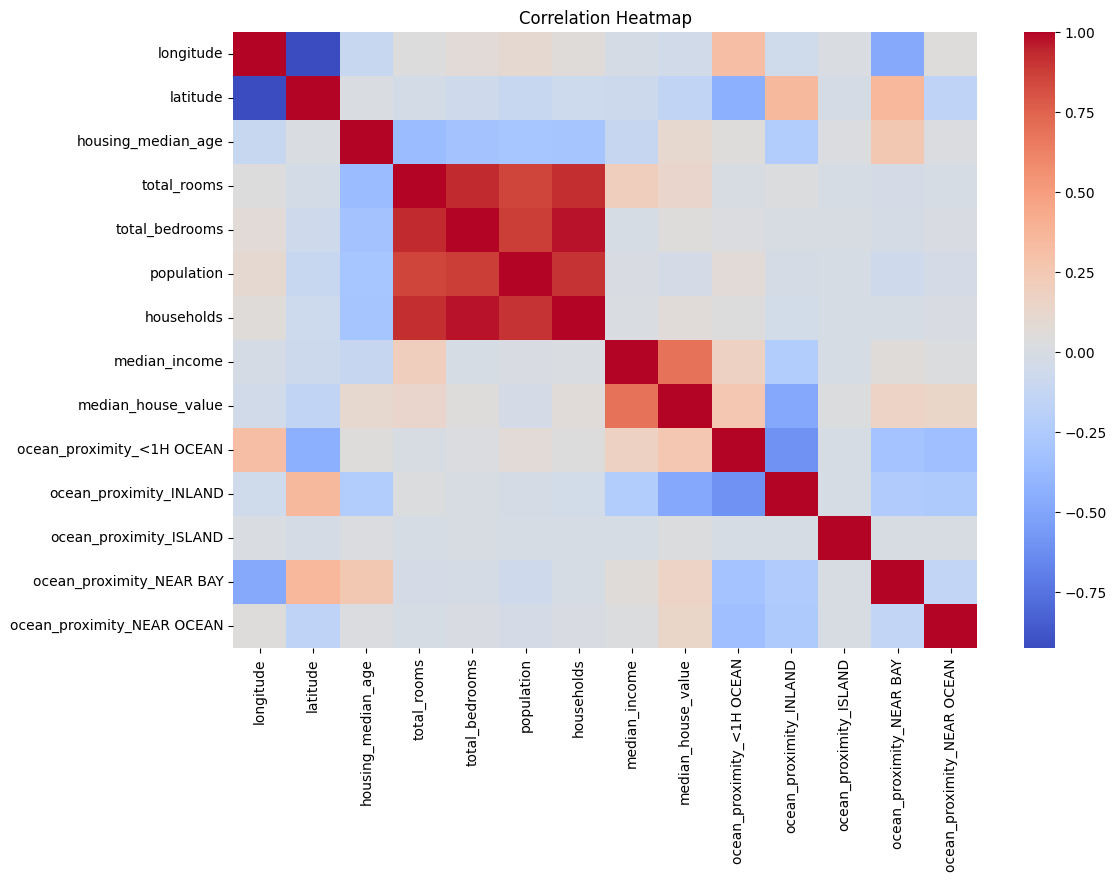

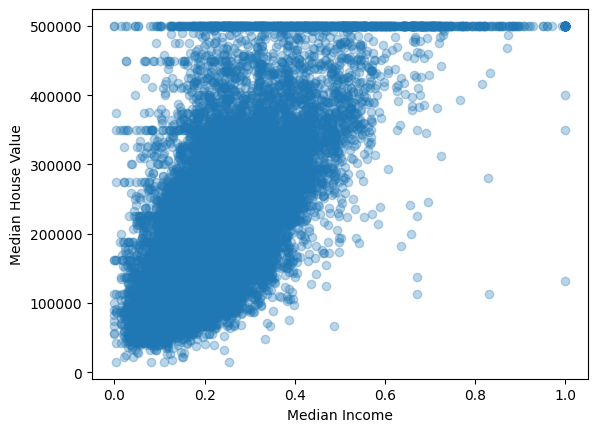


Top 3 Positively Correlated:
median_income                0.688075
ocean_proximity_<1H OCEAN    0.256617
ocean_proximity_NEAR BAY     0.160284
Name: median_house_value, dtype: float64

Most Negatively Correlated:
ocean_proximity_INLAND   -0.484859
Name: median_house_value, dtype: float64

MODEL PERFORMANCE
RMSE: 70060.52184473518
MAE: 50670.7382409719
R2 Score: 0.6254240620553606


In [4]:
# ================================
# IMPORT LIBRARIES
# ================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# ================================
# LOAD DATASET
# ================================

url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
housing = pd.read_csv(url)


# ================================
# FIRST 10 ROWS + DATA TYPES
# ================================

print(housing.head(10))
print("\nData Types:\n", housing.dtypes)


# ================================
# BASIC STATISTICS
# ================================

print(housing.describe())


# ================================
# TARGET DISTRIBUTION
# ================================

housing["median_house_value"].hist(bins=50)
plt.title("Histogram of Median House Value")
plt.show()

sns.boxplot(x=housing["median_house_value"])
plt.title("Boxplot of Median House Value")
plt.show()


# ================================
# MISSING VALUES
# ================================

print("\nMissing Values (%):")
print(housing.isnull().mean()*100)


# ================================
# IMPUTE total_bedrooms
# ================================

imputer = SimpleImputer(strategy="median")
housing["total_bedrooms"] = imputer.fit_transform(housing[["total_bedrooms"]])


# ================================
# STRATIFIED SPLIT (median_income)
# ================================

housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0.,1.5,3.0,4.5,6.,np.inf],
                               labels=[1,2,3,4,5])

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_idx, test_idx in split.split(housing, housing["income_cat"]):
    strat_train = housing.loc[train_idx]
    strat_test = housing.loc[test_idx]

housing.drop("income_cat", axis=1, inplace=True)


# ================================
# ONE HOT ENCODING
# ================================

housing = pd.get_dummies(housing, columns=["ocean_proximity"])


# ================================
# MINMAX SCALING
# ================================

minmax_scaler = MinMaxScaler(feature_range=(0,1))
X_minmax = housing.drop("median_house_value", axis=1)
housing[X_minmax.columns] = minmax_scaler.fit_transform(X_minmax)


# ================================
# CORRELATION MATRIX + HEATMAP
# ================================

corr_matrix = housing.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


# ================================
# SCATTER PLOT
# ================================

plt.scatter(housing["median_income"], housing["median_house_value"], alpha=0.3)
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.show()


# ================================
# RANDOM TRAIN TEST SPLIT
# ================================

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)


# ================================
# TOP CORRELATIONS
# ================================

corr_target = corr_matrix["median_house_value"].sort_values(ascending=False)

print("\nTop 3 Positively Correlated:")
print(corr_target[1:4])

print("\nMost Negatively Correlated:")
print(corr_target.tail(1))


# ================================
# STANDARD SCALING
# ================================

scaler = StandardScaler()

X = housing.drop("median_house_value", axis=1)
y = housing["median_house_value"]

X_scaled = scaler.fit_transform(X)


# ================================
# FINAL TRAIN TEST
# ================================

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


# ================================
# LINEAR REGRESSION
# ================================

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


# ================================
# EVALUATION
# ================================

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nMODEL PERFORMANCE")
print("RMSE:", rmse)
print("MAE:", mae)
print("R2 Score:", r2)
